In [303]:
import sys
import pandas as pd
import seaborn as sns
import sklearn as sklearn
from sklearn import model_selection
from sklearn import linear_model
import matplotlib
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

In [304]:
# DATA
# Load data set and edit
db = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv')
#print(db.info(show_counts=True)) #show non-null counts
print(db.head()) # preview values in columns
db = db.drop(columns='ocean_proximity') # remove ocean prox column bc output is text
db = db.dropna(0, how='any') # drop rows with missing values
print(db.info(show_counts=True)) # verify

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639

C:\Users\sarah\AppData\Local\Temp\ipykernel_31772\3956133943.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  db = db.dropna(0, how='any') # drop rows with missing values


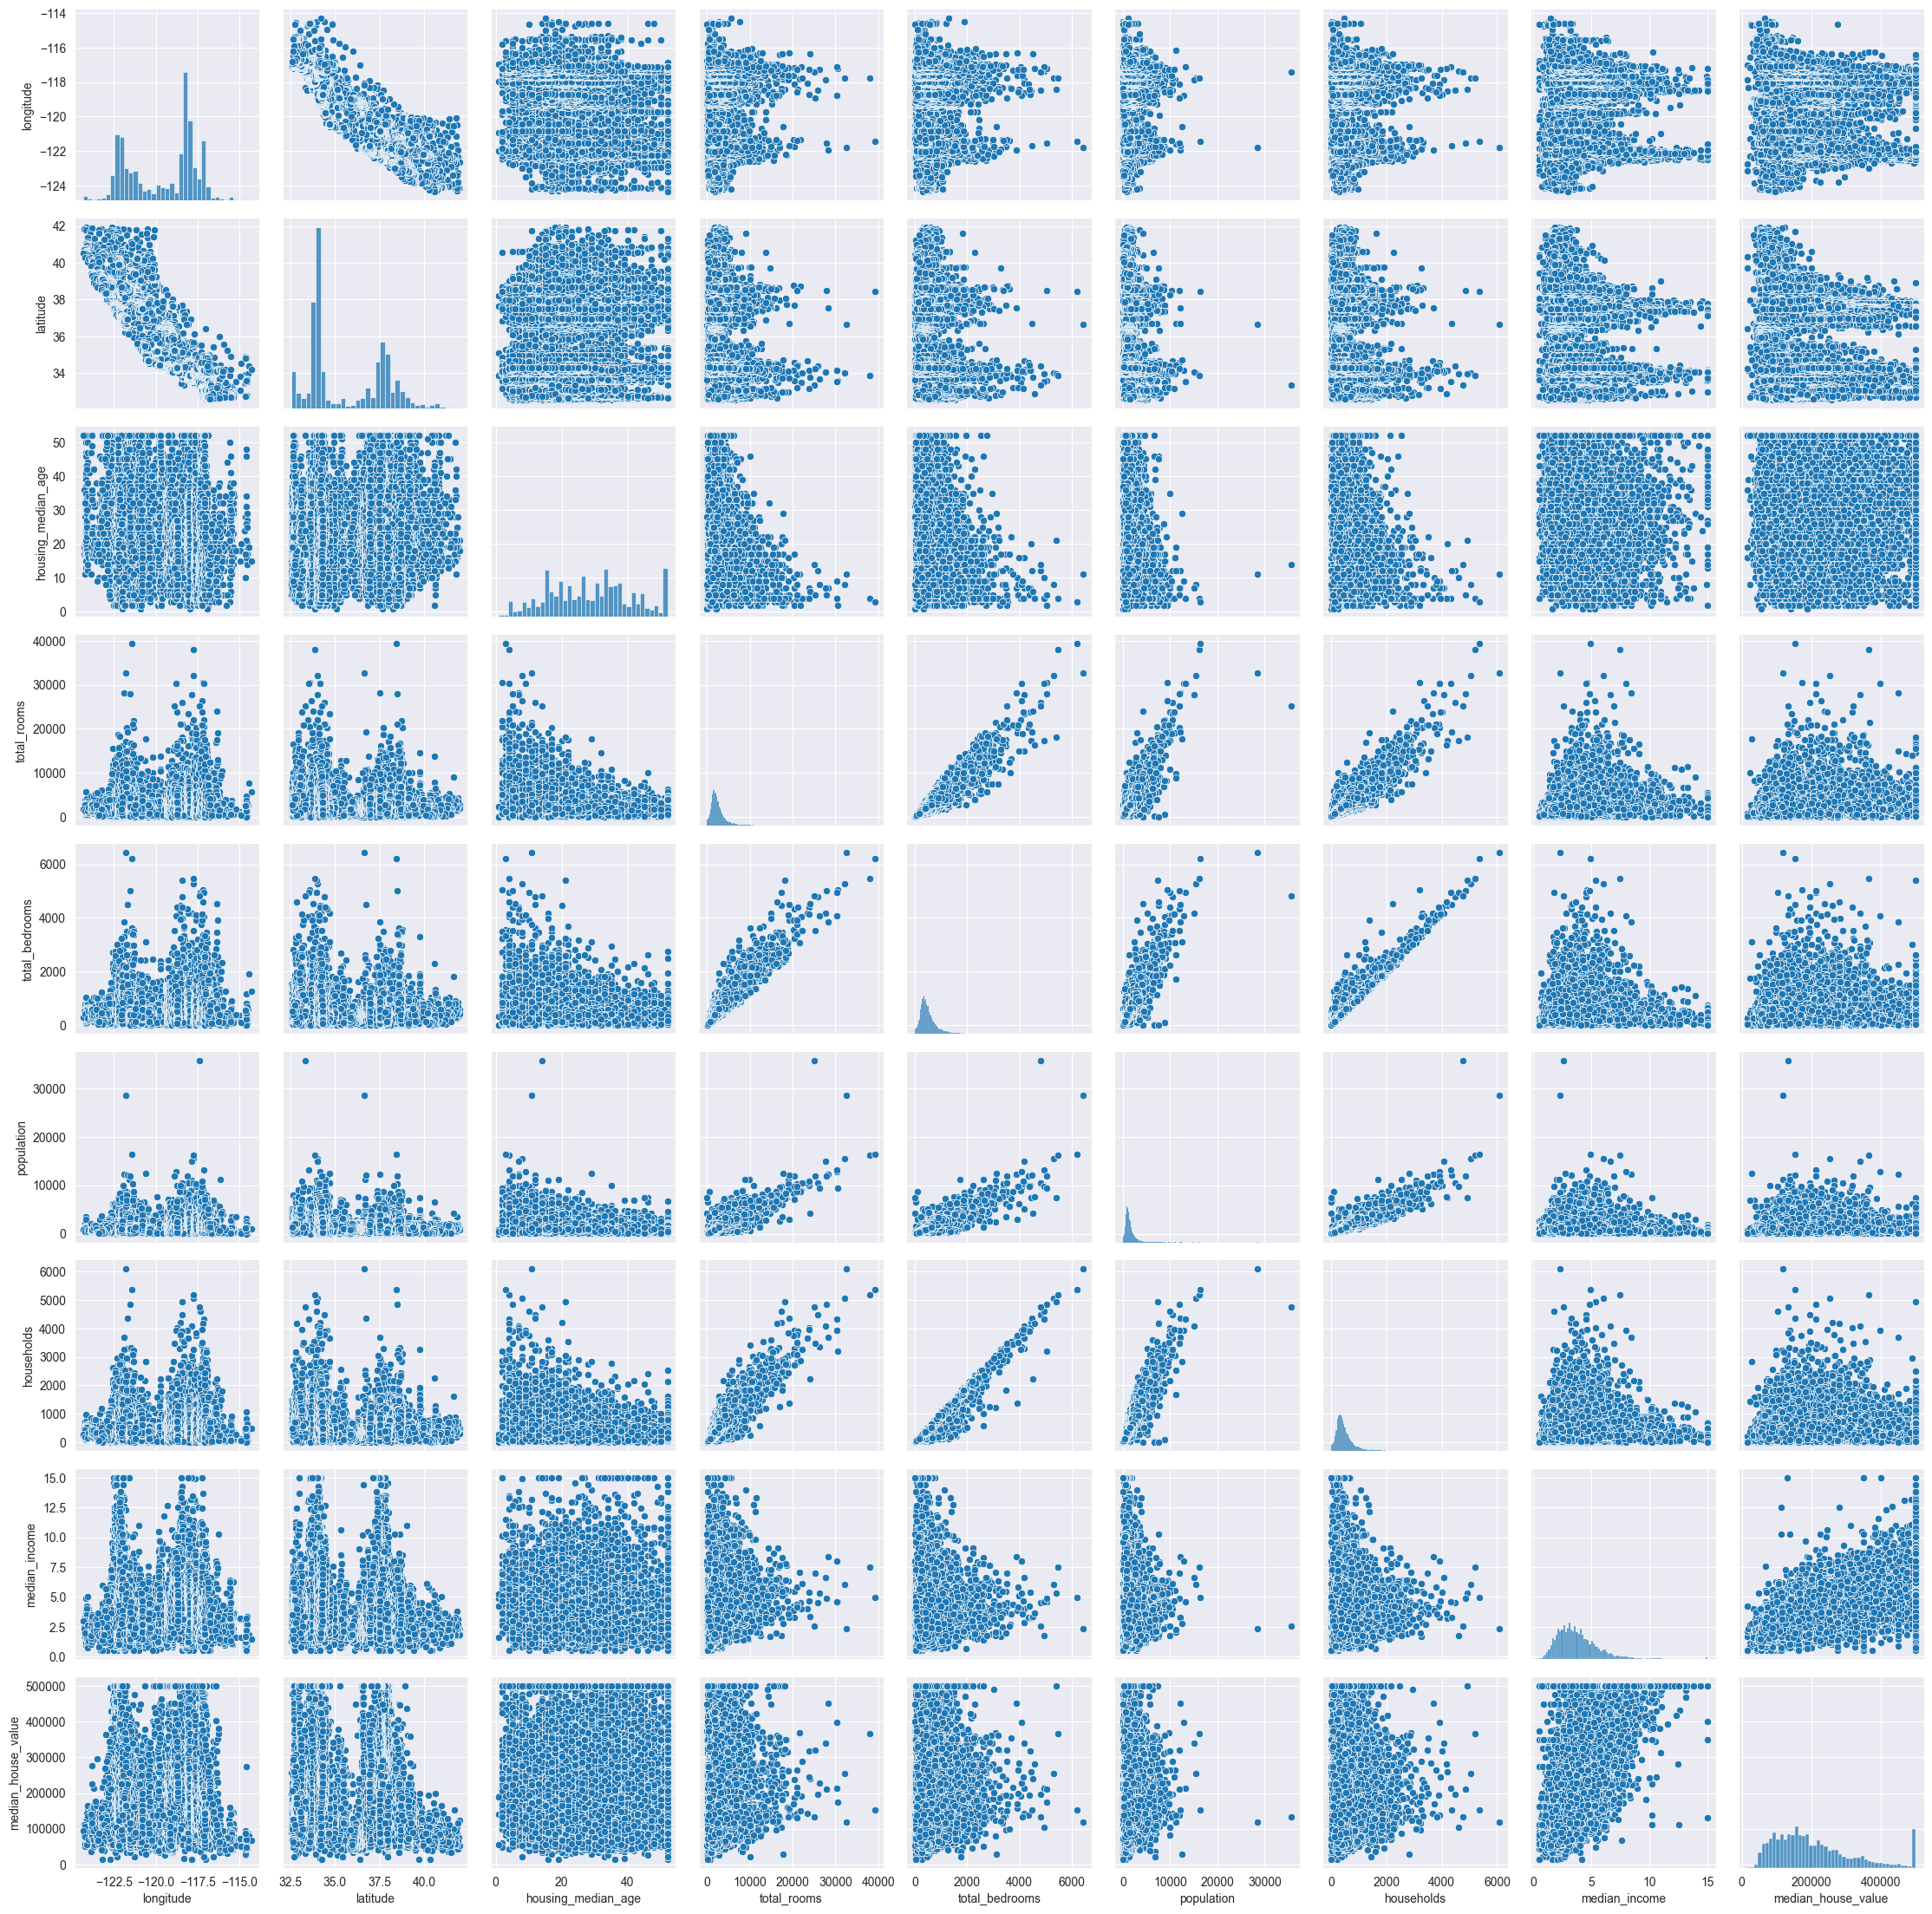

In [305]:
# Create a pair grid with all columns
g = sns.PairGrid(db)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

In [306]:
# Create DataFrame x with all features and target array y
# except deleted (near ocean) and last feature (target/median house value)?
x = db.iloc[:, :-1]
y = db['median_house_value']

In [307]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.25)
print('x_train: ', x_train)
print(type(x_train))    # x_train is type date frame
print(type(x_test))     # x_test is type data frame
print(type(y_test))    # y_train is type series
print(type(y_test))    # y_train is type series

x_train:         longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
9087     -118.17     34.66                 9.0       1561.0           253.0   
16786    -122.47     37.67                20.0       5689.0           992.0   
12636    -121.49     38.47                26.0       6121.0          1185.0   
7914     -118.08     33.88                30.0       1901.0           519.0   
10715    -117.84     33.65                 4.0       1649.0           456.0   
...          ...       ...                 ...          ...             ...   
19731    -122.10     40.05                26.0        633.0           129.0   
4976     -118.28     34.00                48.0       1514.0           376.0   
2749     -115.56     32.76                15.0       1278.0           217.0   
14723    -117.04     32.80                11.0       1802.0           440.0   
9090     -118.22     34.66                17.0       3810.0           662.0   

       population  households  median_inc

In [308]:
# LINEAR REGRESSION
# Create a linear regression model and fit to training data
lr = sklearn.linear_model.LinearRegression().fit(x_train, y_train)
print('Intercept: ', lr.intercept_)
print('Coefficients: ', lr.coef_)

Intercept:  -3609613.581254044
Coefficients:  [-4.29315645e+04 -4.25225752e+04  1.14765792e+03 -8.75136899e+00
  1.20596437e+02 -3.72024555e+01  4.00420620e+01  4.04876124e+04]


In [309]:
# Display R2 and MSE of training and testing sets
# do we get separate predictions for training and testing sets?
p_train = lr.predict(x_train)
p_test = lr.predict(x_test)

mse_train = sklearn.metrics.mean_squared_error(y_train, p_train)
print("MSE_train: ", mse_train)
r2_train = sklearn.metrics.r2_score(y_train, p_train)
print("R2_train: ", r2_train)

mse_test = sklearn.metrics.mean_squared_error(y_test, p_test)
print("MSE_test: ", mse_test)
r2_test = sklearn.metrics.r2_score(y_test, p_test)
print("R2_test: ", r2_test)

MSE_train:  4807718599.276527
R2_train:  0.6397664196889015
MSE_test:  4931117145.26829
R2_test:  0.628076894104393


In [310]:
# POLYNOMIAL FEATURES, DEGREE 2
# Create linear regression with polynomial features and fit to training data
poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly_2.fit(x_train)
x_train_poly2 = poly_2.transform(x_train)
lr_poly2 = LinearRegression().fit(x_train_poly2, y_train)
train_predicted_poly2 = lr_poly2.predict(x_train_poly2)

Coefficients:  [ 5.90637645e+05  9.11323207e+05 -7.78914050e+04  8.98914675e+02
 -3.90160291e+03  5.72781613e+02 -2.52448540e+03 -9.01088898e+05
  4.10832311e+03  1.14243187e+04 -9.34824483e+02  1.16193136e+01
 -5.64301219e+01  8.77642782e+00 -2.90758580e+01 -1.16442643e+04
  6.63039965e+03 -9.97653321e+02  1.24428815e+01 -7.05285501e+01
  1.33132355e+01 -3.13407006e+01 -1.22551987e+04  2.48883158e+01
 -3.63091678e-01  3.86103538e+00 -1.16572263e+00  2.52312129e+00
  1.59259555e+02 -1.45224930e-03  3.41822529e-02 -6.94400702e-03
  3.75208972e-03  8.26658125e+00 -1.96092799e-01  4.42095469e-02
  6.25610173e-02 -4.35629118e+01  2.95709391e-03 -2.67342285e-02
 -4.15762819e+00  6.77279902e-03  2.40140684e+01 -2.35900327e+03]
Intercept:  19695165.963181466


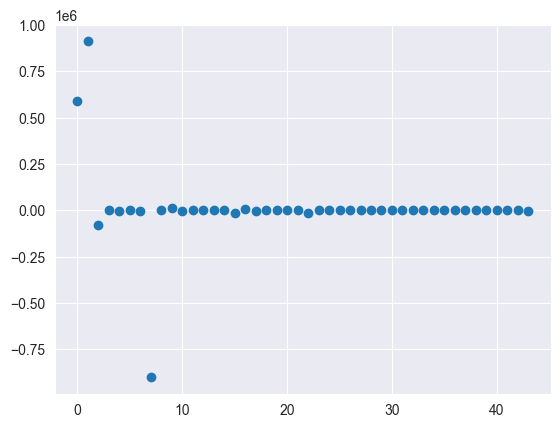

In [311]:
# Display resulting model parameters and create scatter plot
print("Coefficients: ", lr_poly2.coef_)  # the coefficients of each term
print("Intercept: ", lr_poly2.intercept_)
plt.scatter(range(len(lr_poly2.coef_)), lr_poly2.coef_)  # plot of coefficients

In [312]:
# Display R2 and MSE for training and testing sets
print("Training MSE: ", mean_squared_error(y_train, train_predicted_poly2))
print("Training R2: ", lr_poly2.score(x_train_poly2, y_train))

# is this right?? do the same for test?
#poly_2.fit(x_test)  # only fit/transform training; only transform testing
x_test_poly2 = poly_2.transform(x_test)
lr_poly2 = LinearRegression().fit(x_test_poly2, y_test)
test_predicted_poly2 = lr_poly2.predict(x_test_poly2)

print("Testing MSE: ", mean_squared_error(y_test, test_predicted_poly2))
print("Testing R2: ", lr_poly2.score(x_test_poly2, y_test))

Training MSE:  3976538496.9557467
Training R2:  0.7020452278095384
Testing MSE:  3975777300.9009185
Testing R2:  0.7001321610217249


In [313]:
# POLYNOMIAL FEATURES, DEGREE 3
# Create linear regression with polynomial features and fit to training data
poly_3 = PolynomialFeatures(degree=3, include_bias=False)
poly_3.fit(x_train)
x_train_poly3 = poly_3.transform(x_train)
lr_poly3 = LinearRegression().fit(x_train_poly3, y_train)
train_predicted_poly3 = lr_poly3.predict(x_train_poly3)

Coefficients:  [-9.56396793e+06  1.11577638e+06  7.06638216e+05  1.39122864e+03
  4.41101153e+05  1.04812571e+04 -5.34376634e+05  1.66926271e+04
 -6.24882268e+04  1.03475466e+05  1.59534227e+04 -2.66369955e+01
  1.02647342e+04 -2.10775327e+02 -1.10781812e+04  1.78790279e+04
  1.38956573e+05  1.54301968e+04 -1.48352250e+02  9.21841332e+03
 -1.23586466e+03 -6.73873968e+03  3.93969662e+04 -1.04393714e+03
  3.74308100e+01  1.99027873e+02  2.30191720e+01 -5.36601881e+02
 -1.38054288e+04 -8.25973305e-02  8.82413504e-01  1.00509455e+00
 -2.46356300e+00  7.83467804e+01 -5.05332903e+00 -1.26971454e+01
  4.20915135e+01  7.17144458e+02 -1.45482323e-01  7.99547317e+00
 -1.24879192e+02 -2.73479219e+01 -2.55671767e+03  6.83059627e+04
 -5.26512061e+01  1.16798790e+03  8.60671005e+01 -1.91180913e-01
  5.83228778e+01 -3.39513629e+00 -5.80623171e+01  1.55006759e+02
  2.45047449e+03  1.53068607e+02 -3.21272871e-01  9.77096791e+01
 -1.61853356e+01 -7.29323536e+01  3.79904621e+02 -1.20598535e+01
  4.561842

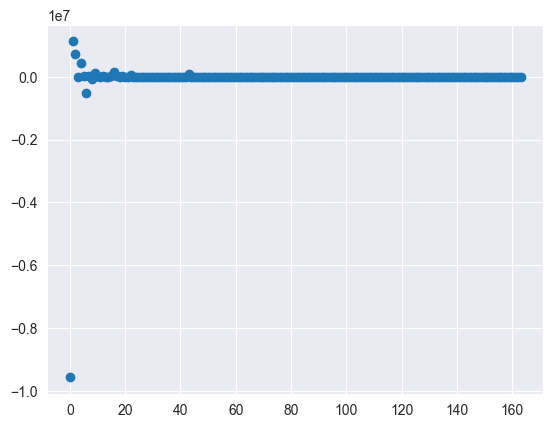

In [314]:
# Display resulting model parameters and create scatter plot
print("Coefficients: ", lr_poly3.coef_)  # the coefficients of each term
print("Intercept: ", lr_poly3.intercept_)
plt.scatter(range(len(lr_poly3.coef_)), lr_poly3.coef_)  # plot of coefficients

In [315]:
# Display R2 and MSE for training and testing sets
print("Training MSE: ", mean_squared_error(y_train, train_predicted_poly3))
print("Training R2: ", lr_poly3.score(x_train_poly3, y_train))

#poly_3.fit(x_test)
x_test_poly3 = poly_3.transform(x_test)
lr_poly3 = LinearRegression().fit(x_test_poly3, y_test)
test_predicted_poly3 = lr_poly3.predict(x_test_poly3)

print("Testing MSE: ", mean_squared_error(y_test, test_predicted_poly3))
print("Testing R2: ", lr_poly3.score(x_test_poly3, y_test))

Training MSE:  3383002188.3133116
Training R2:  0.7465178201819522
Testing MSE:  3415481980.5221047
Testing R2:  0.7423917078211804


The original linear regression model is consistent with the degree 2 and degree 3 models. As expected, the R2 values decreased slightly as we increased the degree, since it always will as we add features. R2 scores went from about 0.65 with 1 degree up to 0.74 for 3 degrees. Also, as expected from adding more features, the MSEs decreased as we increased the degree. MSE went from about 4.8 billion down to 3.9 billion and finally to 3.4 billion for degree 3 polynomial. For each model, the test scores were very similar to the training scores, which seems to indicate that the models generalized fairly well. However, with R2s lower than 0.75 for all models, the models do not seem to be a great fit for the data.


In [316]:
# USING GRADIENT DESCENT
# Use SGDRegressor to perform linear regression and display R2 and MSE
lr_sgd = SGDRegressor(alpha=0, learning_rate='constant', eta0=0.0000000000005, max_iter=1000000).fit(x_train, y_train)

In [317]:
# Display R2 and MSE for training and testing sets
p_train_sgd = lr_sgd.predict(x_train)
print("Training MSE: ", mean_squared_error(y_train, p_train_sgd))
print("Training R2: ", lr_sgd.score(x_train, y_train))

p_test_sgd = lr_sgd.predict(x_test)
print("Testing MSE: ", mean_squared_error(y_test, p_test_sgd))
print("Testing R2: ", lr_sgd.score(x_test, y_test))
# Display model parameters
print("Coefficients: ", lr_sgd.coef_)
print("Intercept: ", lr_sgd.intercept_)


Training MSE:  11519563813.05748
Training R2:  0.13686010728158582
Testing MSE:  11276215587.559523
Testing R2:  0.1495060854318001
Coefficients:  [-1365.14592996   384.4419628    474.56528382    41.57575305
  -241.08875297   -57.64289289   230.76515177   104.64181487]
Intercept:  [11.40890003]
